In [685]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [686]:
df = pd.read_csv("/Users/mdnaif/Desktop/Winter_Arc_ML/Mall_Customers-2.csv")

In [687]:
print(f"Size : {df.size} , Shape : {df.shape}")

Size : 1000 , Shape : (200, 5)


In [688]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [689]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [690]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [691]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-Means Clustering

In [692]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X_scaled)
    wcss.append(km.inertia_)

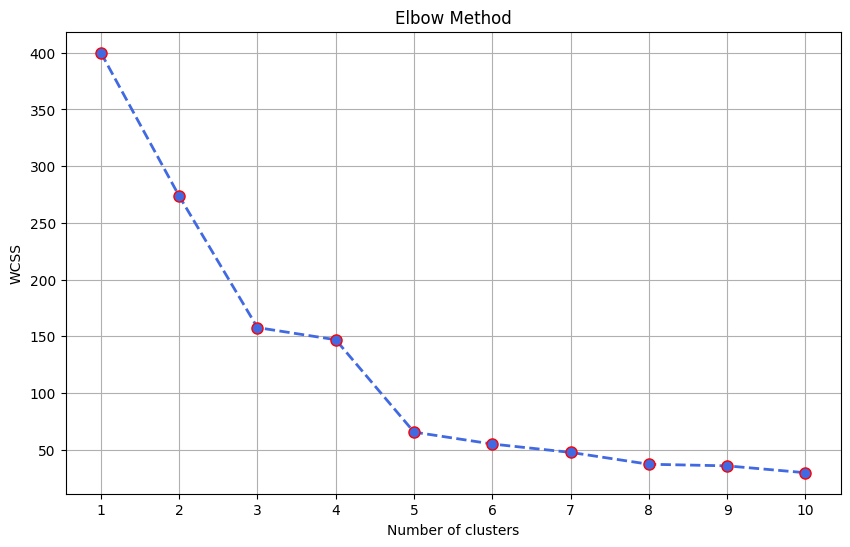

In [693]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss,
         marker="o",
         markersize=8,
         markeredgecolor="red",
         linestyle="--",
         color="royalblue",
         linewidth=2)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.grid()
plt.show()

In [694]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X_scaled)

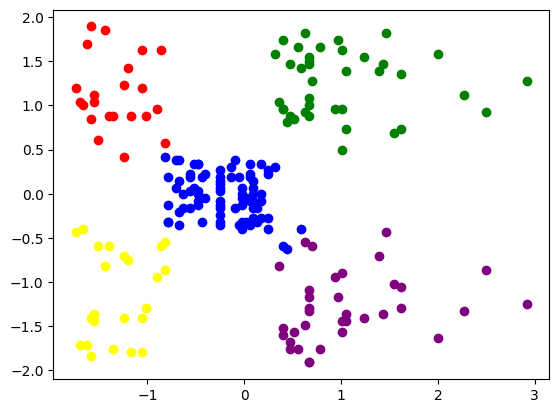

In [695]:
X_np = X_scaled

plt.scatter(X_np[y_means == 0,0], X_np[y_means == 0,1], color= "red")
plt.scatter(X_np[y_means == 1,0], X_np[y_means == 1,1], color= "blue")
plt.scatter(X_np[y_means == 2,0], X_np[y_means == 2,1], color= "green")
plt.scatter(X_np[y_means == 3,0], X_np[y_means == 3,1], color= "purple")
plt.scatter(X_np[y_means == 4,0], X_np[y_means == 4,1], color= "yellow")

### Hierarchical Clustering

In [696]:
from sklearn.cluster import AgglomerativeClustering

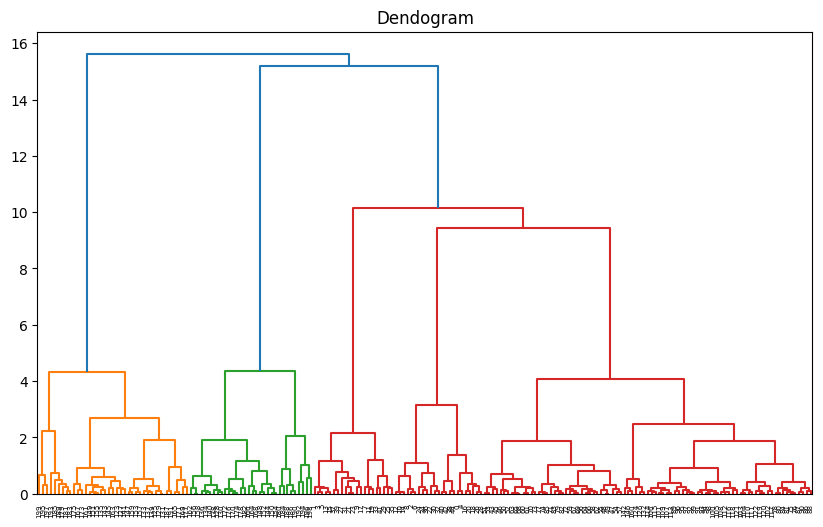

In [697]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,6))
plt.title("Dendogram")
dend = sch.dendrogram(sch.linkage(X_np, method="ward"))


In [698]:
hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
y_hc = hc.fit_predict(X_scaled)

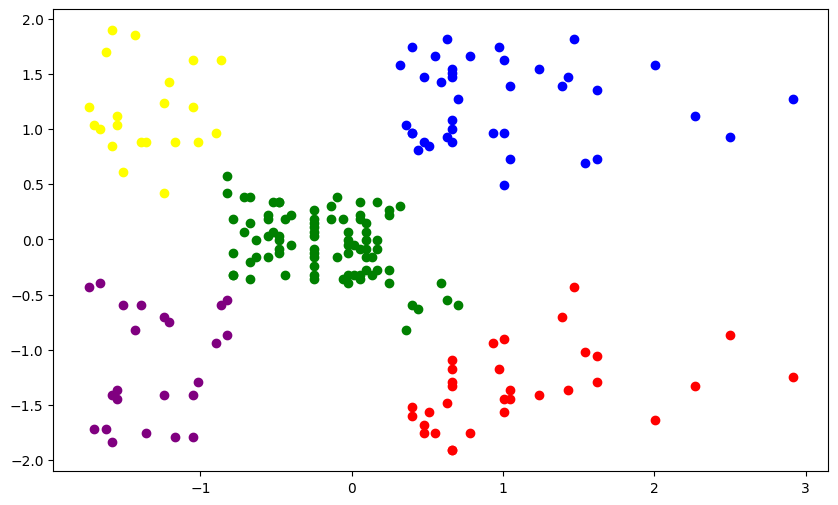

In [699]:
plt.figure(figsize=(10,6))
plt.scatter(X_np[y_hc == 0,0], X_np[y_hc == 0,1], color = "red")
plt.scatter(X_np[y_hc == 1,0], X_np[y_hc == 1,1], color = "blue")
plt.scatter(X_np[y_hc == 2,0], X_np[y_hc == 2,1], color = "green")
plt.scatter(X_np[y_hc == 3,0], X_np[y_hc == 3,1], color = "yellow")
plt.scatter(X_np[y_hc == 4,0], X_np[y_hc == 4,1], color = "purple")

### DBSCAN

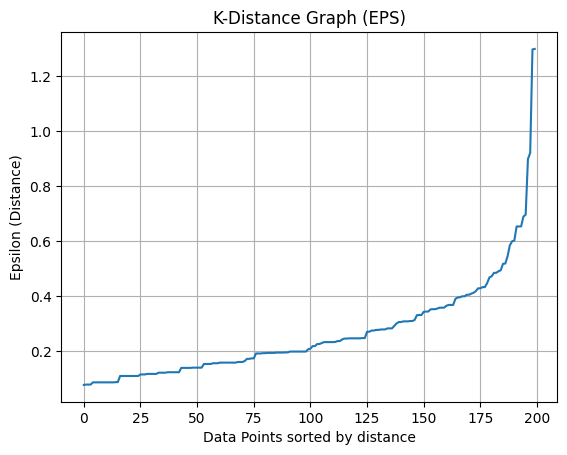

In [700]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)

distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4], axis = 0)

plt.plot(distances)
plt.title('K-Distance Graph (EPS)')
plt.ylabel('Epsilon (Distance)')
plt.xlabel('Data Points sorted by distance')
plt.grid(True)
plt.show()

In [701]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples = 5, eps = 0.4)
y_db = dbscan.fit_predict(X_scaled)

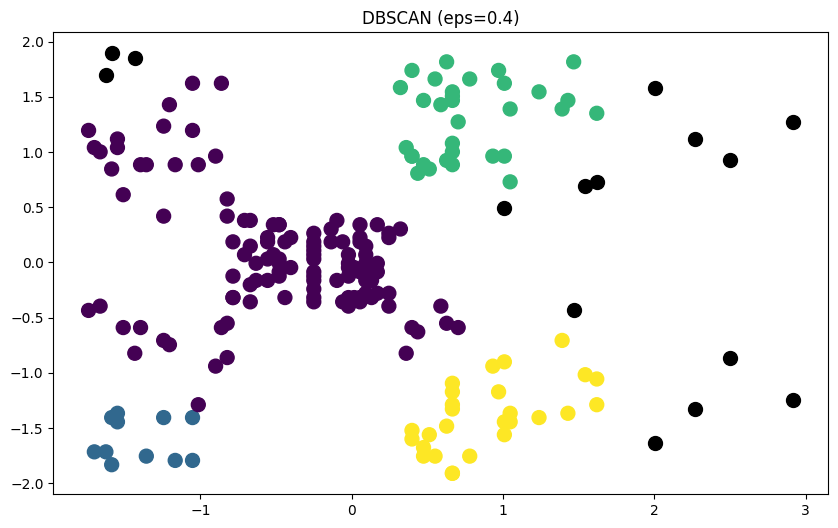

In [702]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_db != -1, 0], X_scaled[y_db != -1, 1], c=y_db[y_db != -1], cmap='viridis', s=100)
plt.scatter(X_scaled[y_db == -1, 0], X_scaled[y_db == -1, 1], c='black', label='Noise', s=100)
plt.title(f'DBSCAN (eps=0.4)')
plt.show()

In [703]:
from sklearn.metrics import silhouette_score

# K-Means Score
print(f"K-Means Silhouette: {silhouette_score(X_scaled, y_means)}")

# Hierarchical Score (Agglomerative)
print(f"Hierarchical Silhouette: {silhouette_score(X_scaled, y_hc)}")

# DBSCAN Score
mask = y_db != -1
if sum(mask) > 0: 
    print(f"DBSCAN Silhouette: {silhouette_score(X_scaled[mask], y_db[mask])}")

K-Means Silhouette: 0.5546571631111091
Hierarchical Silhouette: 0.5538089226688662
DBSCAN Silhouette: 0.4780592455223124
